<a href="https://colab.research.google.com/github/Chamalb7/Titanic-Survival-Prediction---ML/blob/main/titanic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from warnings import filterwarnings 
filterwarnings(action='ignore')

In [2]:
train = pd.read_csv('/content/train.csv')
test = pd.read_csv('/content/test.csv')

In [3]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train.shape

(891, 12)

In [5]:
test.shape

(418, 11)

In [6]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

Text(0.5, 1.0, 'Passengers survived according to the ticket class')

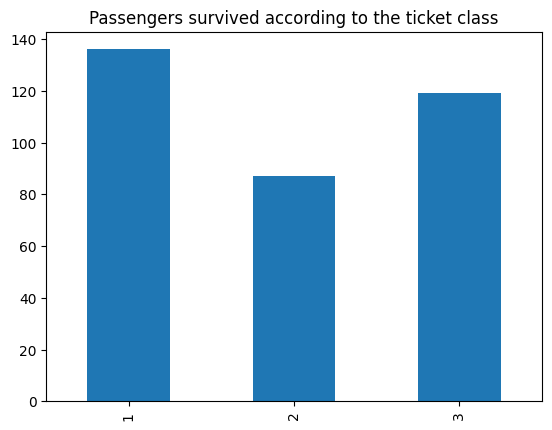

In [8]:
from pandas.core.base import value_counts
train.loc[train['Survived']==1, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Passengers survived according to the ticket class')

Text(0.5, 1.0, "Passengers couln't survived according to the ticket class")

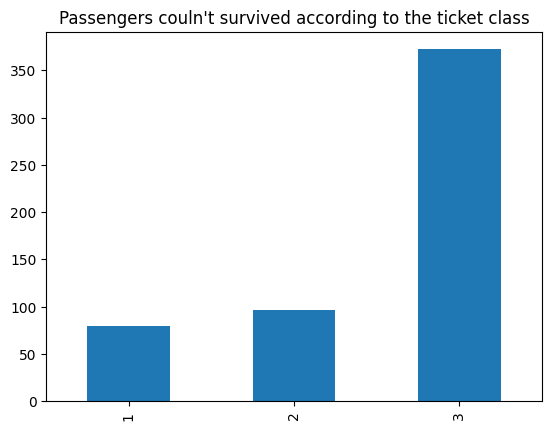

In [9]:
train.loc[train['Survived']==0, 'Pclass'].value_counts().sort_index().plot.bar()
plt.title('Passengers couln\'t survived according to the ticket class')

([<matplotlib.axis.XTick at 0x7f46ccedf790>,
 [Text(0, 0, '0'),
  Text(10, 0, '10'),
  Text(20, 0, '20'),
  Text(30, 0, '30'),
  Text(40, 0, '40'),
  Text(50, 0, '50'),
  Text(60, 0, '60'),
  Text(70, 0, '70'),
  Text(80, 0, '80'),
  Text(90, 0, '90')])

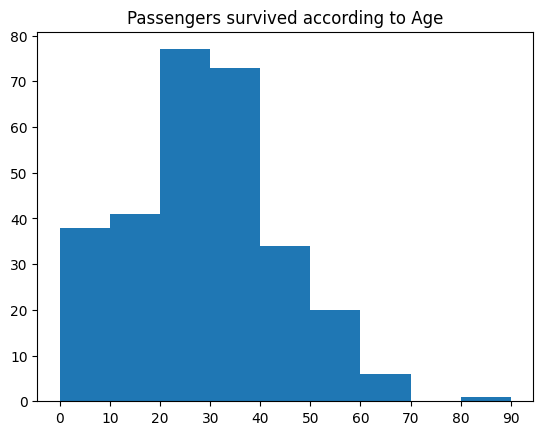

In [10]:
#Survival Based on AGE
age= train.loc[train.Survived ==1, 'Age']
plt.title('Passengers survived according to Age')
plt.hist(age,np.arange(0,100,10))
plt.xticks(np.arange(0,100,10))

In [11]:
from pandas.core import groupby
train[['Pclass','Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [12]:
train[['SibSp','Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [13]:
train[['Embarked','Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


In [14]:
#feature selection- most important step as per me
column_train=['Age','Sex','Pclass','SibSp','Embarked']
#traing values(independent values)
X= train[column_train]
#target value(dependent value)
Y=train['Survived']

In [15]:
#Age has missing values and we have to fill them with median
X['Age']=X['Age'].fillna(X['Age'].median())

In [16]:
X['Age'].isnull().sum()

0

In [17]:
#now let's convert values in Sex into integers
d={'male':0, 'female':1}
X['Sex']= X['Sex'].apply(lambda x:d[x])
X['Sex'].head()

0    0
1    1
2    1
3    1
4    0
Name: Sex, dtype: int64

In [18]:
e={'C':0, 'Q':1, 'S':2, 'NaN':-1}
X['Embarked']= X['Embarked'].apply(lambda x:e[x]
                                   if x in e else e ['NaN'])
X['Embarked'].head()

0    2
1    0
2    2
3    2
4    2
Name: Embarked, dtype: int64

In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=7)

In [21]:
#decision tree
from sklearn.tree import DecisionTreeClassifier
model =DecisionTreeClassifier(criterion='entropy',random_state=7)
model.fit(X_train,Y_train)
y_pred = model.predict(X_test)

In [22]:
from sklearn.metrics import accuracy_score
acc = accuracy_score(Y_test,y_pred)*100
acc

75.74626865671642

In [23]:
y_pred.sum()

91

In [24]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [25]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [26]:
submission=test[['PassengerId']]


In [27]:
submission

,PassengerId
0,892
1,893
2,894
3,895
4,896
...,...
413,1305
414,1306
415,1307
416,1308


In [28]:
!pip install joblib


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [30]:
import joblib

# Save the trained model
joblib.dump(model, 'trained_model.joblib')


['trained_model.joblib']

In [31]:
test_data = pd.read_csv('/content/test.csv')

In [32]:
model = joblib.load('trained_model.joblib')

In [41]:
test_data.isnull().sum()


PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [42]:
test_data['Age']=test_data['Age'].fillna(test_data['Age'].median())

In [43]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [44]:
test_data['Sex'] = test_data['Sex'].map({'male': 0, 'female': 1})

In [45]:
feature_columns = ['Age', 'Sex', 'Pclass', 'SibSp', 'Embarked']

In [47]:
test_data['Sex']

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Sex, Length: 418, dtype: int64

In [50]:
test_data['Embarked'] = test_data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [51]:
test_data['Embarked']

0      1
1      2
2      1
3      2
4      2
      ..
413    2
414    0
415    2
416    2
417    0
Name: Embarked, Length: 418, dtype: int64

In [52]:
test_features = test_data[feature_columns]

In [53]:
predictions = model.predict(test_features)

In [56]:
output = pd.DataFrame({'PassengerId': test_data['PassengerId'], 'Survived': predictions})

# Save the predictions to a CSV file
output.to_csv('predictions.csv', index=False)